# Global Maritime Pirate Attacks (1993–2020) Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\akash\Documents\dataset\kaggle dataset\pirate_attacks.csv')
df

,date,time,longitude,latitude,attack_type,location_description,nearest_country,eez_country,shore_distance,shore_longitude,shore_latitude,attack_description,vessel_name,vessel_type,vessel_status,data_source
0,1993-01-02,NaN,116.966700,19.700000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,357.502373,115.825956,22.746644,NaN,Mv Cosmic Leader,NaN,NaN,mappingpiracy
1,1993-01-04,NaN,116.000000,22.350000,NaN,Hong Kong - Luzon - Hainan,CHN,CHN,47.431573,115.825956,22.746644,NaN,Mv Tricolor Star III,NaN,NaN,mappingpiracy
2,1993-01-06,NaN,115.250000,19.670000,NaN,Hong Kong - Luzon - Hainan,CHN,TWN,280.811871,114.302501,22.044867,NaN,Mv Arktis Star,NaN,NaN,mappingpiracy
3,1993-01-08,NaN,124.583300,29.900000,NaN,East China Sea,CHN,CHN,209.923396,122.409679,29.911200,NaN,Ussurijsk,NaN,NaN,mappingpiracy
4,1993-01-12,NaN,120.266700,18.133333,NaN,Hong Kong - Luzon - Hainan,PHL,PHL,22.027332,120.470063,18.091010,NaN,Mv Chennai Nermai,NaN,NaN,mappingpiracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,2020-12-15,02:15 UTC,4.751944,2.000833,Boarded,Around 165nm SSW of Brass,STP,STP,269.439937,6.497813,0.312690,15.12.2020: 0215 UTC: Posn: 02:00.3N - 004:45....,NaN,Product Tanker,NaN,imb
7507,2020-12-19,13:36 UTC,6.169167,2.602222,Boarded,Around 100nm South of Brass,STP,STP,168.407993,7.371837,1.677191,19.12.2020: 1336 UTC: Posn: 02:36.8N – 006:10....,NaN,Container,NaN,imb
7508,2020-12-21,04:09 UTC,5.616667,2.616667,Boarded,"Around 107nm SSW of Brass, Nigeria",NGA,NGA,191.182791,6.112804,4.272162,"21.12.2020: 0409 UTC: Posn : 02:37N – 005:37E,...",NaN,Container,NaN,imb
7509,2020-12-26,01:30 UTC,-1.683333,4.883333,Boarded,Takoradi Anchorage,GHA,GHA,6.288180,-1.718821,4.927680,26.12.2020: 0130 UTC: Posn: 04:53.51N – 001:41...,NaN,General Cargo,Anchored,imb


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  7511 non-null   object 
 1   time                  1149 non-null   object 
 2   longitude             7511 non-null   float64
 3   latitude              7511 non-null   float64
 4   attack_type           7391 non-null   object 
 5   location_description  7503 non-null   object 
 6   nearest_country       7492 non-null   object 
 7   eez_country           7216 non-null   object 
 8   shore_distance        7511 non-null   float64
 9   shore_longitude       7511 non-null   float64
 10  shore_latitude        7511 non-null   float64
 11  attack_description    1173 non-null   object 
 12  vessel_name           6079 non-null   object 
 13  vessel_type           1173 non-null   object 
 14  vessel_status         6599 non-null   object 
 15  data_source          

In [4]:
df.drop(columns=['time','attack_description','vessel_type'],inplace=True)

In [5]:
df['attack_type'].fillna(df['attack_type'].mode()[0] , inplace=True)
df.drop(columns=['vessel_name','vessel_status','eez_country'],inplace=True)

In [6]:
df['nearest_country'].fillna(df['nearest_country'].mode()[0] , inplace=True)
df['location_description'].fillna(df['location_description'].mode()[0] , inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  7511 non-null   object 
 1   longitude             7511 non-null   float64
 2   latitude              7511 non-null   float64
 3   attack_type           7511 non-null   object 
 4   location_description  7511 non-null   object 
 5   nearest_country       7511 non-null   object 
 6   shore_distance        7511 non-null   float64
 7   shore_longitude       7511 non-null   float64
 8   shore_latitude        7511 non-null   float64
 9   data_source           7511 non-null   object 
dtypes: float64(5), object(5)
memory usage: 586.9+ KB


In [14]:
df

,date,longitude,latitude,attack_type,location_description,nearest_country,shore_distance,shore_longitude,shore_latitude,data_source
0,1993-01-02,116.966700,19.700000,Boarded,Hong Kong - Luzon - Hainan,CHN,357.502373,115.825956,22.746644,mappingpiracy
1,1993-01-04,116.000000,22.350000,Boarded,Hong Kong - Luzon - Hainan,CHN,47.431573,115.825956,22.746644,mappingpiracy
2,1993-01-06,115.250000,19.670000,Boarded,Hong Kong - Luzon - Hainan,CHN,280.811871,114.302501,22.044867,mappingpiracy
3,1993-01-08,124.583300,29.900000,Boarded,East China Sea,CHN,209.923396,122.409679,29.911200,mappingpiracy
4,1993-01-12,120.266700,18.133333,Boarded,Hong Kong - Luzon - Hainan,PHL,22.027332,120.470063,18.091010,mappingpiracy
...,...,...,...,...,...,...,...,...,...,...
7506,2020-12-15,4.751944,2.000833,Boarded,Around 165nm SSW of Brass,STP,269.439937,6.497813,0.312690,imb
7507,2020-12-19,6.169167,2.602222,Boarded,Around 100nm South of Brass,STP,168.407993,7.371837,1.677191,imb
7508,2020-12-21,5.616667,2.616667,Boarded,"Around 107nm SSW of Brass, Nigeria",NGA,191.182791,6.112804,4.272162,imb
7509,2020-12-26,-1.683333,4.883333,Boarded,Takoradi Anchorage,GHA,6.288180,-1.718821,4.927680,imb


In [8]:
df['attack_type'].unique()

array(['Boarded', 'Attempted', 'Hijacked', 'Boarding', 'Fired Upon',
       'Explosion', 'Detained', 'Suspicious'], dtype=object)

In [9]:
df['attack_type'].value_counts()

attack_type
Boarded       3541
Attempted     1999
Boarding      1367
Hijacked       511
Fired Upon      73
Suspicious      16
Explosion        3
Detained         1
Name: count, dtype: int64

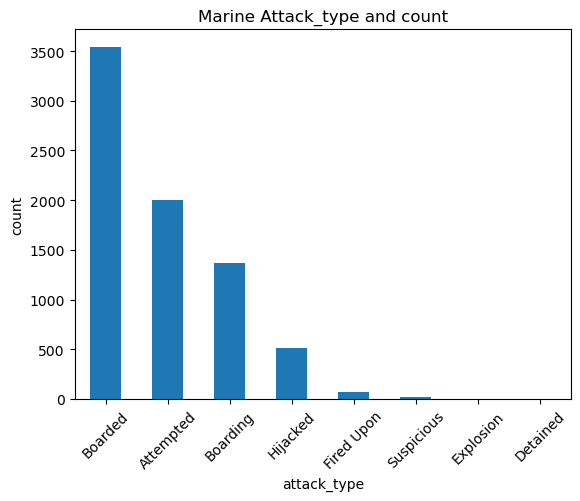

In [10]:
df['attack_type'].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('count')
plt.title('Marine Attack_type and count')
plt.show()

- Most of Maritime Pirate Attacks are Boarded attack(3541)

In [11]:
df['location_description'].value_counts()

location_description
Gulf of Aden                                    336
Malacca Straits                                 143
Indonesia                                       121
Singapore Straits                               118
Chittagong Anchorage, Bangladesh                 75
                                               ... 
Off Trivandrum, SW Coast India                    1
Off Tg. Pelepas Anchorage, Singapore Straits      1
60 Miles from Eastern Coast of Somalia            1
Off Eastern Coast of Somalia                      1
Around 94nm South of Brass                        1
Name: count, Length: 3986, dtype: int64

- Most of attckes location_description were 'Gulf of Aden' (336).


In [12]:
df['nearest_country'].value_counts()

nearest_country
IDN    1958
NGA     559
YEM     546
MYS     529
BGD     470
       ... 
GMB       1
MLT       1
GUF       1
CCK       1
GTM       1
Name: count, Length: 103, dtype: int64

In [13]:
attack_max=df['nearest_country'].value_counts().max()
total_attk = df['nearest_country'].value_counts().sum()
max_attk_percent=(attack_max/total_attk)*100
max_attk_percent

26.068432964984687

- On the beside of Indonesia(IDN) ,the most Maritime Pirate Attacks that happend.
- 1958 attack happend near Indonesia and 2nd most is Nigeria(NGA) with 559.
- 26.068432964984687 % maritime attack happen in Indonesia

In [16]:
df['data_source'].value_counts()

data_source
mappingpiracy    6338
imb              1173
Name: count, dtype: int64

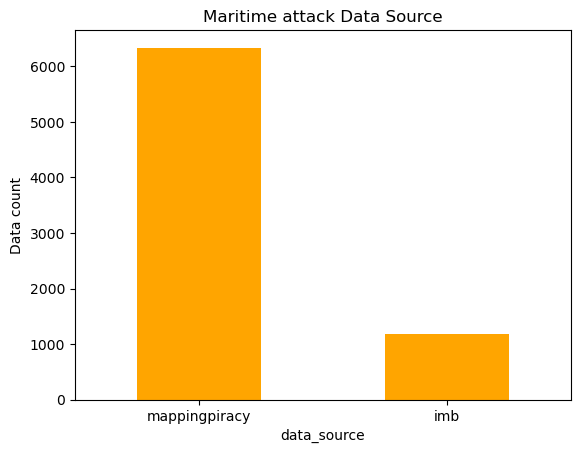

In [25]:
df['data_source'].value_counts().plot(kind='bar',color='orange')
plt.xticks(rotation=0)
plt.title('Maritime attack Data Source')
plt.ylabel('Data count')
plt.show()

In [29]:
total_data=df['data_source'].value_counts().sum()
mappingpiracy = df['data_source'].value_counts().get('mappingpiracy')
imb=df['data_source'].value_counts().get('imb')
percent_imb= (imb/total_data)*100
percent_map= (mappingpiracy/total_data)*100

In [31]:
print(f'Data source mappingpiracy = {percent_map} %')
print(f'Data source imb = {percent_imb} %')

Data source mappingpiracy = 84.38290507256025 %
Data source imb = 15.617094927439757 %


- The data of globel maritime attack from 1993 to 2020 are from two data sources, They are mappingpiracy,imb.
- Most of the data are from mappingpiracy
- 84.38290507256025 % of data are from mappingpiracy and the rest of data from imb

In [53]:
df[df['shore_distance']==df['shore_distance'].min()]

,date,longitude,latitude,attack_type,location_description,nearest_country,shore_distance,shore_longitude,shore_latitude,data_source
6039,2013-10-19,-58.17,6.8133,Boarded,"Georgetown, Guyana",GUY,0.039189,-58.169667,6.813422,mappingpiracy


In [54]:
df[df['shore_distance']==df['shore_distance'].max()]

,date,longitude,latitude,attack_type,location_description,nearest_country,shore_distance,shore_longitude,shore_latitude,data_source
4948,2010-09-29,61.85,6.7917,Attempted,"(Indian Ocean), Off Somalia",YEM,1024.02918,54.540294,12.550238,mappingpiracy


C:\Users\akash\AppData\Local\Temp\ipykernel_3264\4236988230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['shore_distance'])


<Axes: xlabel='shore_distance', ylabel='Density'>

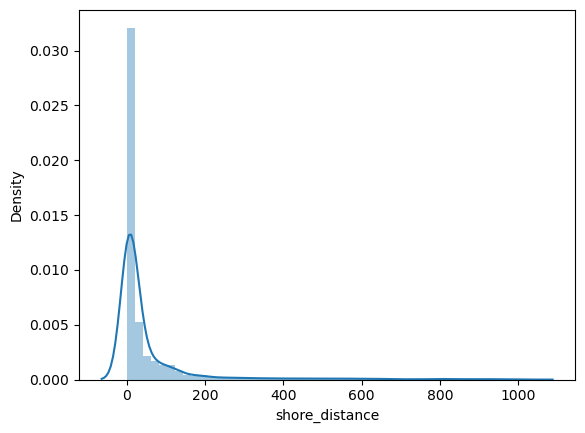

In [58]:
sns.distplot(df['shore_distance'])

In [74]:
df['shore_distance'].mode()

0    2.329971
Name: shore_distance, dtype: float64

<Axes: >

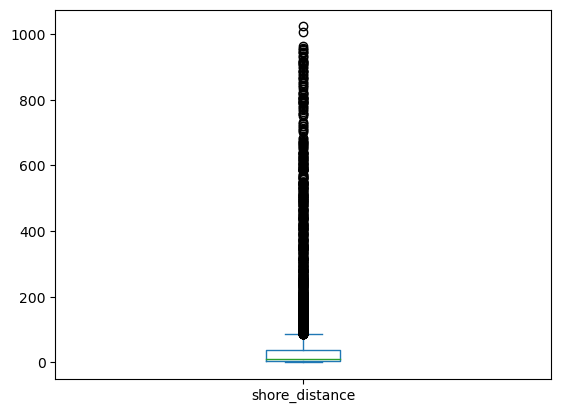

In [73]:
df['shore_distance'].plot.box()

- 0.039189 km is the lowest shore distance (Distance in kilometres to the shore from the attack location) in the whole maritime attack.
- And 1024.02918 km is the largest shore distance
- Georgetown, Guyana is the place with least shore distance in maritime attack while (Indian Ocean), Off Somalia have largest shore distance
- shore distance have lot of out layers ,most values located 2.329971 km distance


In [33]:
df

,date,longitude,latitude,attack_type,location_description,nearest_country,shore_distance,shore_longitude,shore_latitude,data_source
0,1993-01-02,116.966700,19.700000,Boarded,Hong Kong - Luzon - Hainan,CHN,357.502373,115.825956,22.746644,mappingpiracy
1,1993-01-04,116.000000,22.350000,Boarded,Hong Kong - Luzon - Hainan,CHN,47.431573,115.825956,22.746644,mappingpiracy
2,1993-01-06,115.250000,19.670000,Boarded,Hong Kong - Luzon - Hainan,CHN,280.811871,114.302501,22.044867,mappingpiracy
3,1993-01-08,124.583300,29.900000,Boarded,East China Sea,CHN,209.923396,122.409679,29.911200,mappingpiracy
4,1993-01-12,120.266700,18.133333,Boarded,Hong Kong - Luzon - Hainan,PHL,22.027332,120.470063,18.091010,mappingpiracy
...,...,...,...,...,...,...,...,...,...,...
7506,2020-12-15,4.751944,2.000833,Boarded,Around 165nm SSW of Brass,STP,269.439937,6.497813,0.312690,imb
7507,2020-12-19,6.169167,2.602222,Boarded,Around 100nm South of Brass,STP,168.407993,7.371837,1.677191,imb
7508,2020-12-21,5.616667,2.616667,Boarded,"Around 107nm SSW of Brass, Nigeria",NGA,191.182791,6.112804,4.272162,imb
7509,2020-12-26,-1.683333,4.883333,Boarded,Takoradi Anchorage,GHA,6.288180,-1.718821,4.927680,imb


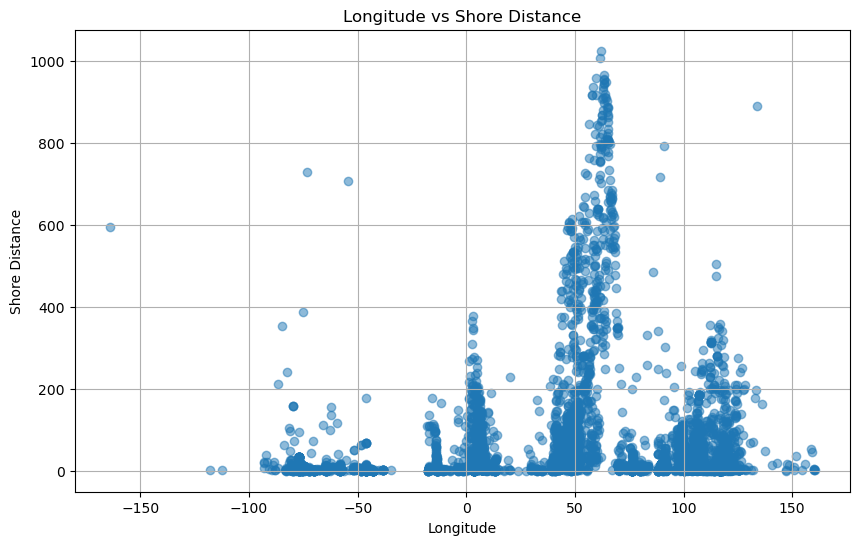

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['shore_distance'], alpha=0.5)
plt.title('Longitude vs Shore Distance')
plt.xlabel('Longitude')
plt.ylabel('Shore Distance')
plt.grid(True)
plt.show()

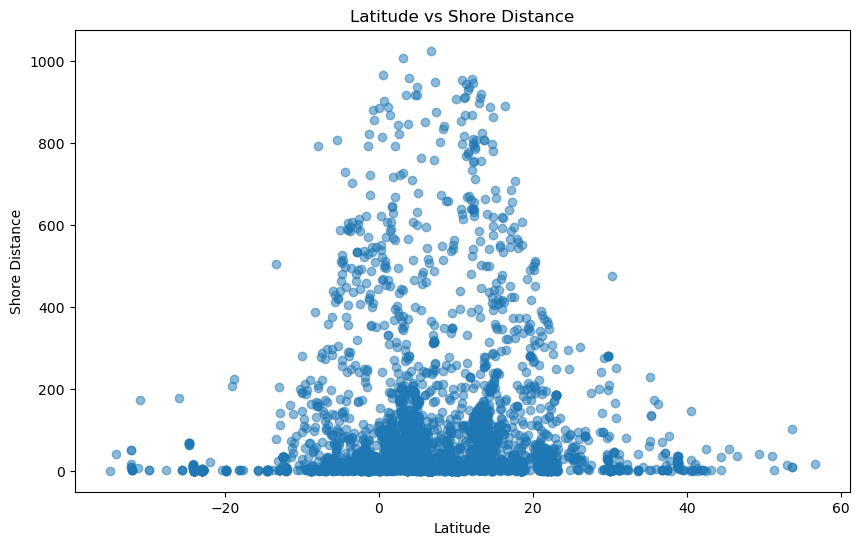

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['shore_distance'], alpha=0.5)
plt.title('Latitude vs Shore Distance')
plt.xlabel('Latitude')
plt.ylabel('Shore Distance')

plt.show()


In [69]:
df.corr(numeric_only=True)

,longitude,latitude,shore_distance,shore_longitude,shore_latitude
longitude,1.000000,0.079831,0.010211,0.999848,0.075479
latitude,0.079831,1.000000,0.049735,0.079678,0.997688
shore_distance,0.010211,0.049735,1.000000,0.007521,0.060632
shore_longitude,0.999848,0.079678,0.007521,1.000000,0.075012
shore_latitude,0.075479,0.997688,0.060632,0.075012,1.000000


- ther is no corrrelation is founded

# Conclusion

* The majority of maritime pirate attacks were of the "Boarded" type, accounting for 3541 incidents.
* The Gulf of Aden was the most frequent location for attacks, with 336 incidents reported.
* Indonesia experienced the highest number of attacks, with 1958 incidents, followed by Nigeria with 559 incidents.
* The data primarily came from two sources: mappingpiracy and imb, with mappingpiracy contributing 84.38% of the data.
* The shore distance varied widely, with the minimum distance being 0.039189 km and the maximum being 1024.02918 km. Georgetown, Guyana, had the shortest shore distance, while the Indian Ocean, off Somalia, had the largest.
* There was no significant correlation found between the numeric variables analyzed (longitude, latitude, shore distance).
* In conclusion, the analysis highlights the prevalence of maritime pirate attacks, the hotspots of these attacks, the data sources used for analysis, and the varying shore distances involved. Despite exploring relationships between certain variables, no clear correlations were observed. This suggests that factors influencing pirate attacks may be more complex and multifaceted than the variables considered in this analysis.